# Introduction to Machine Learning
## Lecture 2 - Classification
### Notebook 3: Non-Parametric Classification with Gaussian Kernel Estimator
Prapared by: Said Bolluk

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the random seed to generate reproducible results
np.random.seed(0)

# Create the input sets
X1 = np.random.normal(4, 1.2, (300, ))
X2 = np.random.normal(8, 0.6, (200,))

# Join arrays and create the whole sets
X = np.concatenate((X2, X1))

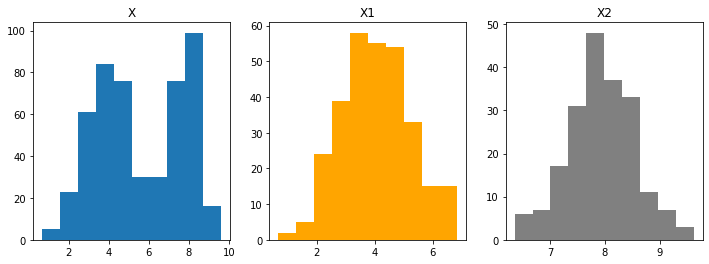

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.hist(X)
ax1.set_title("X")
ax2.hist(X1, color = "orange")
ax2.set_title("X1")
ax3.hist(X2, color="grey")
ax3.set_title("X2")
plt.show()

In [4]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 375
Test size: 125


# 1) Histogram Estimator

Estimate the occurrence probabilitites of X_test based on X_training with **Histogram Estimator.**

In [5]:
def p(x_t, X_train, h, N):
    result = 0
    
    for x_train in X_train:
        u_t = (x_t - x_train) / h
        
        if np.abs(u_t) < 1/2:
            w_u = 1
        else:
            w_u = 0
        p_x = ( 1 / (N*h) ) * w_u
        result += p_x
        
    return result

In [6]:
def histogram_estimator(X_test, bins):
    
    N = X_train.shape[0]
    
    density_list = list()
    for x_t in X_test:
        density = p(x_t, X_train, bins, N)
        density_list.append(density)

    return density_list

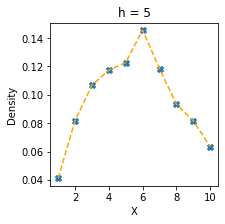

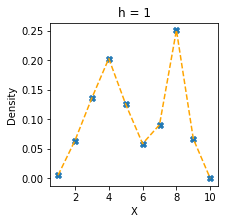

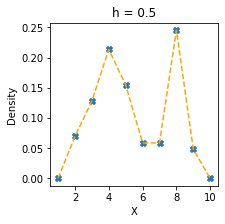

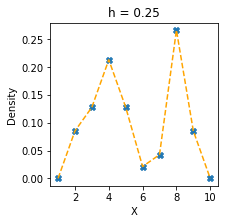

In [7]:
for h in [5, 1, 0.5, 0.25]:
    sample = np.arange(1, 11)
    dens = histogram_estimator(sample, bins=h)
    plt.figure(figsize=(3, 3))
    #plt.hist(dens, bins=20)
    plt.scatter(sample, dens, marker="X")
    plt.plot(sample, dens, color="orange", linestyle="dashed")
    plt.title(f"h = {h}")
    plt.xlabel("X")
    plt.ylabel("Density")
    plt.show()

# 2) Kernel Estimator

Estimate the occurrence probabilitites of X_test based on X_training with **Kernel Estimator.** To obtain smoother distributions than the histogram estimator, we will use the Gaussian Kernel to estimate the distributions based on the training data.

In [8]:
def p(x_t, X_train, h, N):
    result = 0
    
    for x_train in X_train:
        u_t = (x_t - x_train) / h
        k_u = ( 1 / ( np.sqrt(2*np.pi) ) ) * np.exp( -(u_t**2 / 2) )
        p_x = ( 1 / (N*h) ) * k_u
        result += p_x
        
    return result

In [9]:
def kernel_estimator(X_test, bins):
    
    N = X_train.shape[0]
    
    density_list = list()
    for x_t in X_test:
        density = p(x_t, X_train, bins, N)
        density_list.append(density)

    return density_list

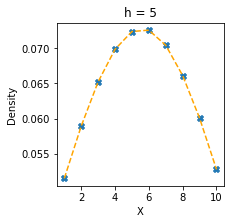

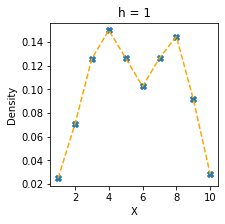

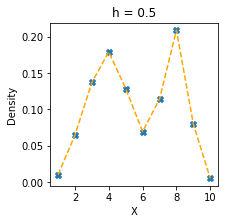

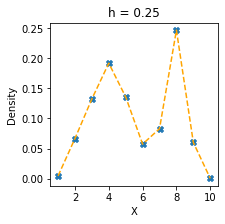

In [10]:
for h in [5, 1, 0.5, 0.25]:
    sample = np.arange(1, 11)
    dens = kernel_estimator(sample, bins=h)
    plt.figure(figsize=(3, 3))
    #plt.hist(dens, bins=20)
    plt.scatter(sample, dens, marker="X")
    plt.plot(sample, dens, color="orange", linestyle="dashed")
    plt.title(f"h = {h}")
    plt.xlabel("X")
    plt.ylabel("Density")
    plt.show()

# 3) Non-parametric Classifier

We will implement a non-parametric classification using the Gaussian Kernel. Note that estimations are not based on the distribution parameters. We only use the Gaussian function to predict the occurrence probability of instances where the input depends on the distance between instances. In brief, we will estimate Gaussian Distributions for small intervals (h) rather then for the whole set. The discriminant function **g(x)** predicts the class.

$$
\
\huge{g_{i}(x)} = \huge{p(x|C_{i})P(C_{i})} = \frac{1}{N_{i}h} \sum_{t=1}^N K(\frac{x-x^t}{h}) r_{i}^t
\
$$

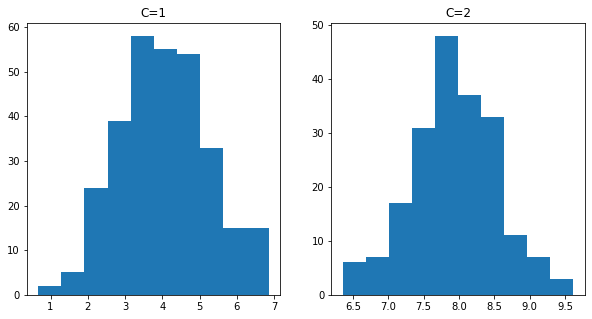

In [11]:
# Set the random seed to generate reproducible results
np.random.seed(0)

# Determine the parameters of the distribution for each classes
mu1, sigma1 = 4, 1.2
mu2, sigma2 = 8, 0.6

# The dataset consists of 2000 instances.
# 1200 of them belong to class one (1) while 800 of them class two (2).


# Create the input sets
X1 = np.random.normal(mu1, sigma1, (300,))
X2 = np.random.normal(mu2, sigma2, (200,))

# Create the target (labels) sets
y1 = np.ones((300,))
y2 = np.full((200, ), 2)

# Join arrays and create the whole sets
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# Plot the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(X1, bins=10)
ax1.set_title("C=1")
ax2.hist(X2, bins=10)
ax2.set_title("C=2")
plt.show()

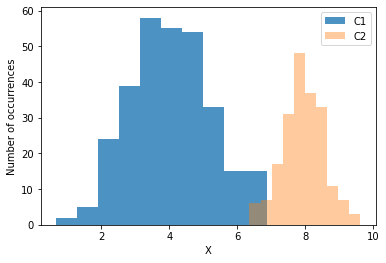

In [12]:
plt.hist(X1, bins=10, alpha=0.8, label="C1")
plt.hist(X2, bins=10, alpha=0.4, label="C2")
plt.xlabel("X")
plt.ylabel("Number of occurrences")
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 375
Test size: 125


In [14]:
# Determien the x_t and r_t values for each class
X1 = X_train[y_train==1]
X2 = X_train[y_train==2]

r1 = y_train[y_train==1]
r2 = y_train[y_train==2]

In [15]:
# Determine the priors
p_c1 = r1.shape[0] / y_train.shape[0]
p_c2 = r2.shape[0] / y_train.shape[0]

print("P(C=1):", np.round(p_c1, 2))
print("P(C=2):", np.round(p_c2, 2))

P(C=1): 0.62
P(C=2): 0.38


In [16]:
def p(x_t, X_train, R, h, N):
    result = 0
    
    for i in range(X_train.shape[0]):
        x_train = X_train[i]
        r_t = R[i]
        u_t = (x_t - x_train) / h
        k_u = ( 1 / ( np.sqrt(2*np.pi) ) ) * np.exp( -(u_t**2 / 2) )
        p_x = ( 1 / (N*h) ) * k_u * r_t
        result += p_x
        
    return result

In [17]:
def classifier(X_test, bins, n_class):
    
    if n_class == 1:
        N = X1.shape[0]
        R = r1
        X_train = X1
        p_c = p_c1
    else:
        N = X2.shape[0]
        R = r2
        X_train = X2
        p_c = p_c2
    
    density_list = list()
    for x_t in X_test:
        density = p(x_t, X_train, R, bins, N) * p_c
        density_list.append(density)

    return density_list

Perform non-parametric classification with different length of intervals (h)

In [18]:
bin_size = [0.1, 1, 5, 10, 25]

accuracy_list = list()
for h in bin_size:

    one = classifier(X_test=X_test, bins=h, n_class=1)
    two = classifier(X_test=X_test, bins=h, n_class=2)

    predictions = list()
    for a, b in zip(one, two):
        if a > b:
            pred = 1
        else:
            pred = 2
        predictions.append(pred)

    accuracy = np.sum(y_test==predictions) / y_test.shape[0]
    accuracy_list.append(accuracy)
    print(f"Accuracy Score with h={h}: {accuracy:.3f}")

Accuracy Score with h=0.1: 0.984
Accuracy Score with h=1: 0.992
Accuracy Score with h=5: 0.856
Accuracy Score with h=10: 0.456
Accuracy Score with h=25: 0.456


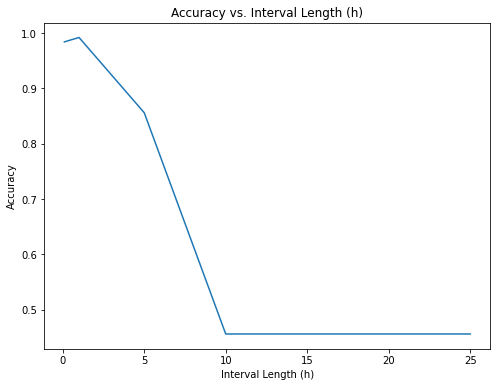

In [19]:
# Visualize the results
h_list = [0.1, 1, 5, 10, 25]
plt.figure(figsize=(8, 6))
plt.plot(h_list, accuracy_list)
plt.title("Accuracy vs. Interval Length (h)")
plt.xlabel("Interval Length (h)")
plt.ylabel("Accuracy")
plt.show()

**Discussion:** As we increase the model complexity with smaller intervals, the accuracy score increases. However, we should be careful about over-fitting the model. If the model complexity is too high, the estimations become dependent on the training set, which weakens the generalization capacity of the model. Tuning model complexity is a crucial topic in ML, and we will discuss this topic in the following sections.

# END